# Analyzing movie reviews

In [41]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
print(movies.columns)
print("\n\n\n")
print(movies.head(2))

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')




                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   

   RT_norm  RT_user_norm         ...        

## Plotting the data

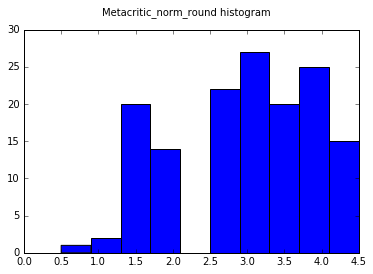

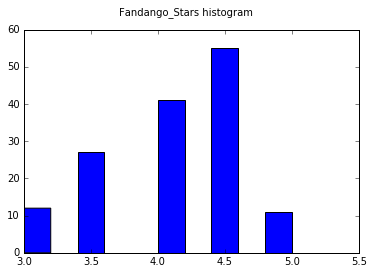

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies["Metacritic_norm_round"])
plt.suptitle("Metacritic_norm_round histogram")
plt.show()

plt.hist(movies["Fandango_Stars"])
plt.suptitle("Fandango_Stars histogram")
plt.show()

## Quantifying the differences between Fandango Stars and Metacritic norm round

In [43]:
import numpy as np

fs_mean = np.mean(movies["Fandango_Stars"])
mnr_mean = np.mean(movies["Metacritic_norm_round"])
print("Fandango_Stars mean: {0}".format(fs_mean))
print("Metacritic_norm_round: {0}".format(mnr_mean))
print("\n\n")

fs_median = np.median(movies["Fandango_Stars"])
mnr_median = np.median(movies["Metacritic_norm_round"])
print("Fandango_Stars median: {0}".format(fs_median))
print("Metacritic_norm_round median: {0}".format(mnr_median))

Fandango_Stars mean: 4.089041095890411
Metacritic_norm_round: 2.9726027397260273



Fandango_Stars median: 4.0
Metacritic_norm_round median: 3.0


In [22]:
fs_std = np.std(movies["Fandango_Stars"])
mnr_std = np.std(movies["Metacritic_norm_round"])
print("Fandango_Stars standard deviation: {0}".format(fs_std))
print("Metacritic_norm_round standard deviation: {0}".format(mnr_std))

Fandango_Stars standard deviation: 0.5385321612699531
Metacritic_norm_round standard deviation: 0.9875610297038631


## Comparing using scatterplots

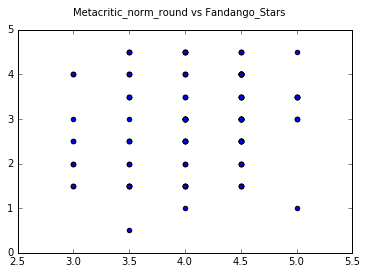

In [25]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
plt.suptitle("Metacritic_norm_round vs Fandango_Stars")
plt.show()

## Finding the differences between the columns

In [45]:
movies["fm_diff"] = numpy.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])
movies.sort_values(by="fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


## Measuring the correlation between Fandango_Stars and Metacritic_norm_round

In [48]:
from scipy.stats import pearsonr
r_value, p_value = pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
print(r_value)

0.178449190739


## Create a linear regression and predict scores

In [52]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
pred_3 = 3 * slope + intercept
print(pred_3)

4.09170715282


## Predicting few more scores

In [55]:
pred_1 = 1 * slope + intercept
print(pred_1)
pred_5 = 5 * slope + intercept
print(pred_5)

3.89708499687
4.28632930877


## Scatter Plot of prediction 

In [ ]:
x = range[]